#                           House Price Prediction Using Machine Learning

##### House price prediction using machine learning involves creating models that can predict the future prices of houses based on various features and historical data. This process typically involves several steps, including data collection, data preprocessing, feature engineering, model selection, training, evaluation, and deployment and deployment. Here’s an overview of each step

# Data Collection

Data collection is the first step in the machine learning process. It involves gathering relevant data for the problem you are trying to solve. This data can come from various sources such as databases, files, APIs, or even web scraping. In the context of machine learning, data can be classified into two categories: features and labels. Features are the input variables that the model uses to make predictions, while labels are the output variables that the model tries to predict.

Gather historical data on house prices along with relevant features such as the number of bedrooms, number of bathrooms, square footage, location, year built, lot size, proximity to amenities, and economic indicators

# Import Necessary Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load data set
data = pd.read_csv("C:/Users/DELL/Downloads/data.csv")
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,5/2/2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,5/2/2014 0:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,5/2/2014 0:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,5/2/2014 0:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,5/2/2014 0:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


## Data Preprocessing:

Data preprocessing is an essential step in the machine learning process that involves cleaning, transforming, and preparing raw data for analysis and modeling. The goal of data preprocessing is to ensure that the data is in a format that can be used by machine learning algorithms to build accurate and reliable models.

Data preprocessing typically involves several steps, including:

Data cleaning: This involves identifying and handling missing or invalid data, such as removing or imputing missing values, correcting errors, and dealing with outliers.

Data transformation: This involves converting data into a format that can be used by machine learning algorithms, such as scaling numerical variables, encoding categorical variables, and creating new features.

Data reduction: This involves reducing the dimensionality of the data, such as by selecting relevant features or using dimensionality reduction techniques like principal component analysis (PCA).

Data split: This involves splitting the data into training, validation, and testing sets to evaluate the performance of the model.

In [4]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

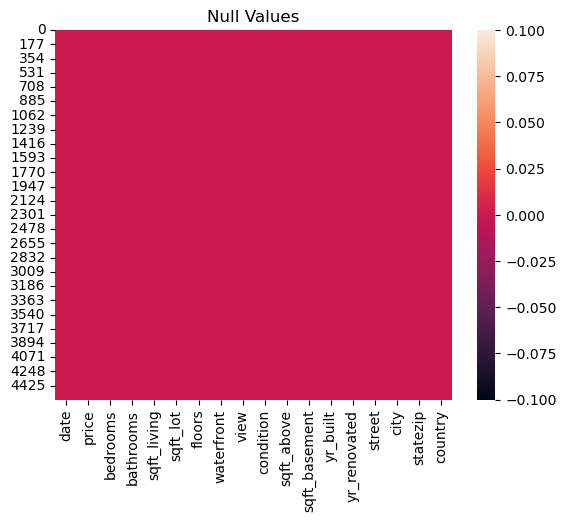

In [6]:
#visual representation Null values
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

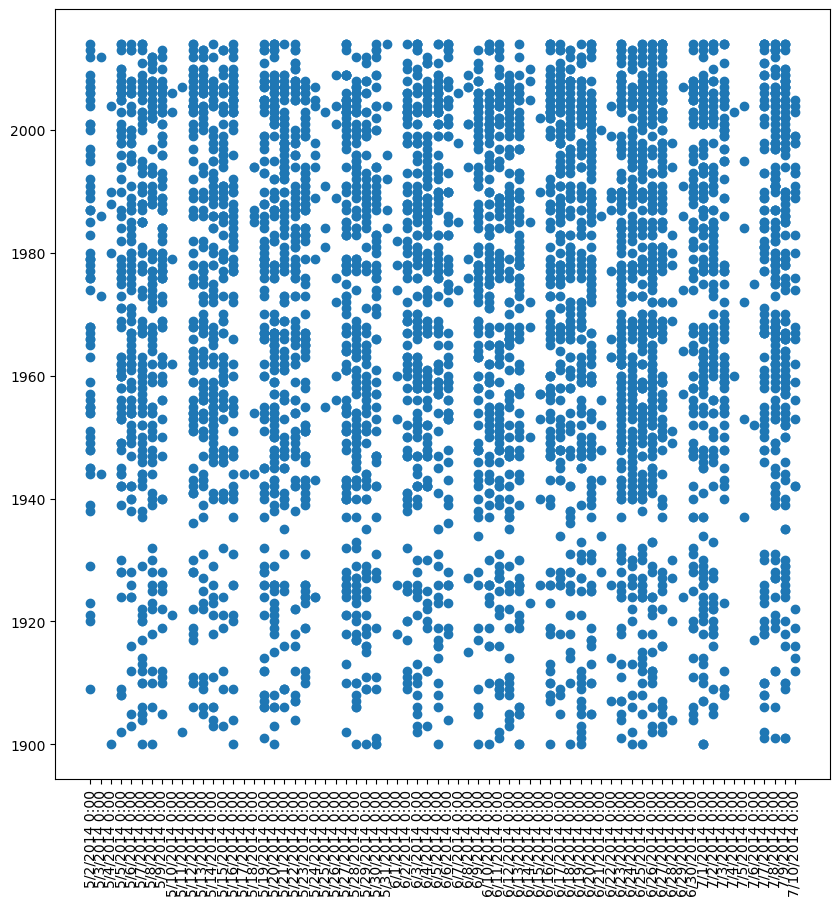

In [7]:
#visualization
fig = plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.scatter(data.date,data.yr_built)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data_corr = data.apply(LabelEncoder().fit_transform)

In [9]:
corr_data = data_corr.corr()

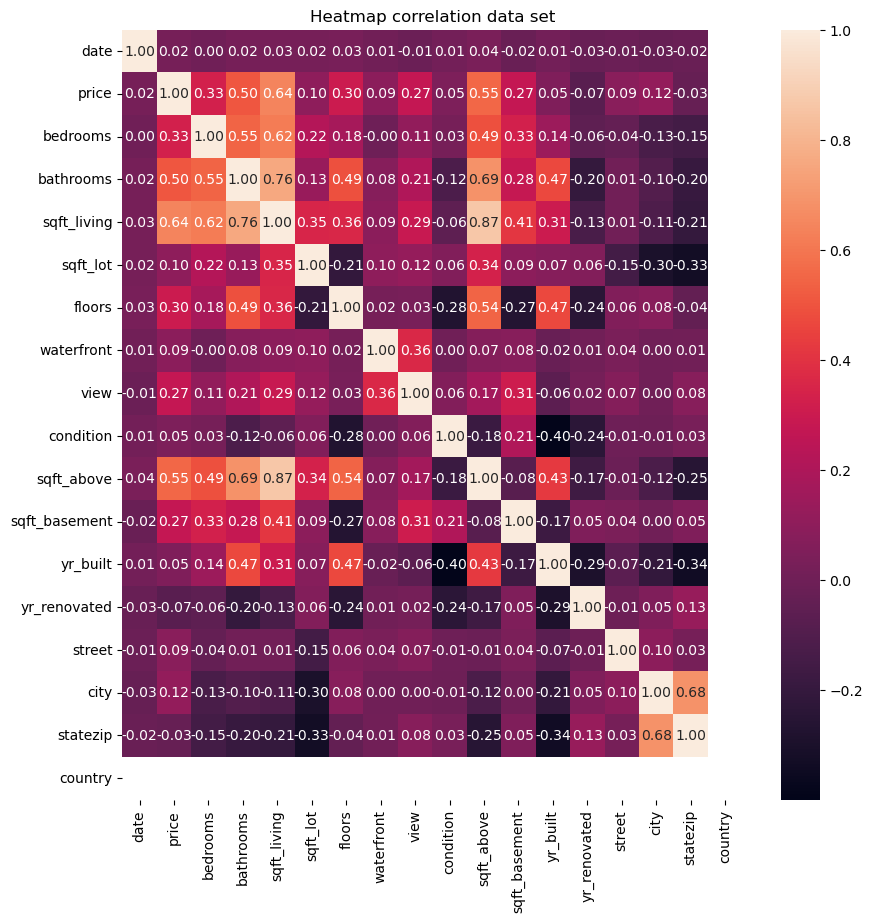

In [10]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_data, annot=True, fmt='.2f')
plt.title('Heatmap correlation data set')
plt.show()

In [11]:
# why using correlarion data



In [12]:
#top price home 
topPrice = data['price'].sort_values(ascending=False).head(10)
topPrice

4350    26590000.0
4346    12899000.0
2286     7062500.0
2654     4668000.0
2761     4489000.0
3729     3800000.0
1637     3710000.0
252      3200000.0
1567     3100000.0
2772     3000000.0
Name: price, dtype: float64

In [13]:
Top_10_Rooms = pd.DataFrame({'price':data['price'],
                           'bedrooms':data['bedrooms'],
                            'bathrooms':data['bathrooms']            
                           })

Top_10_Rooms.sort_values(by="price", ascending=False).head(10)

,price,bedrooms,bathrooms
4350,26590000.0,3,2.00
4346,12899000.0,3,2.50
2286,7062500.0,5,4.50
2654,4668000.0,5,6.75
2761,4489000.0,4,3.00
3729,3800000.0,5,5.50
1637,3710000.0,4,3.50
252,3200000.0,7,4.50
1567,3100000.0,6,4.25
2772,3000000.0,4,4.25


In [14]:
# how seaborn working---
# seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, 
#                  vars=None,x_vars=None, y_vars=None, kind='scatter', 
#                  diag_kind='auto', markers=None, height=2.5, aspect=1, 
#                  corner=False, dropna=False, plot_kws=None, diag_kws=None, 
#                  grid_kws=None, size=None)

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


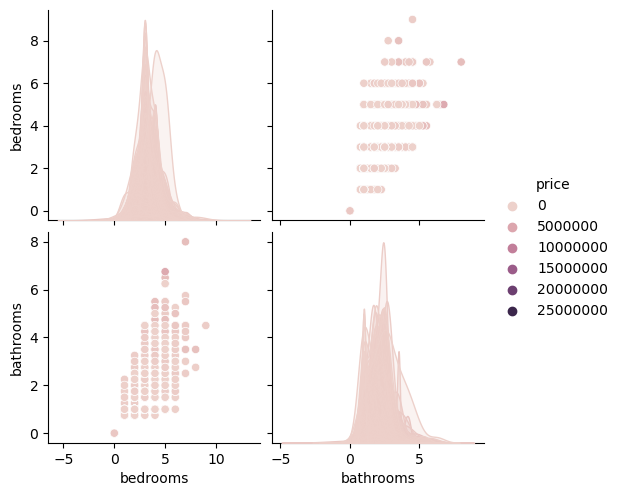

In [15]:
sns.pairplot(Top_10_Rooms , hue ='price')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


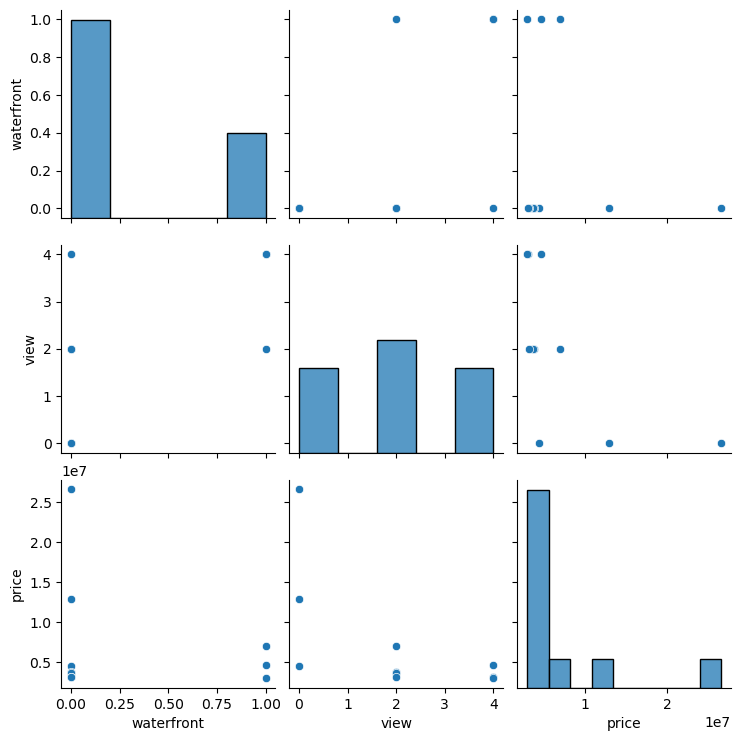

In [16]:
additional_fea= pd.DataFrame({
    'waterfront':data['waterfront'],
    'view' :data['view'],
    'price':data['price']
})

sort_values=additional_fea.sort_values(by="price", ascending=False).head(10)
sns.pairplot(sort_values)
plt.show()

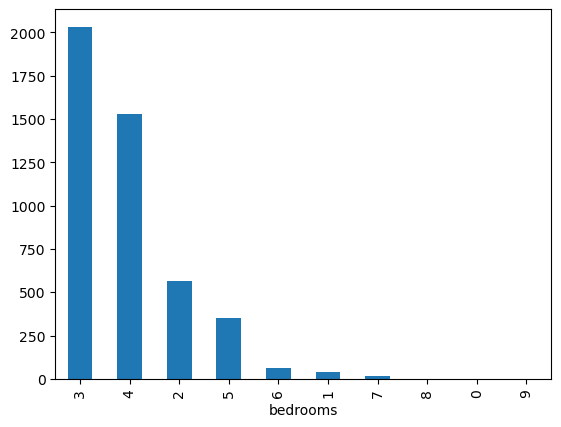

In [17]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.show()

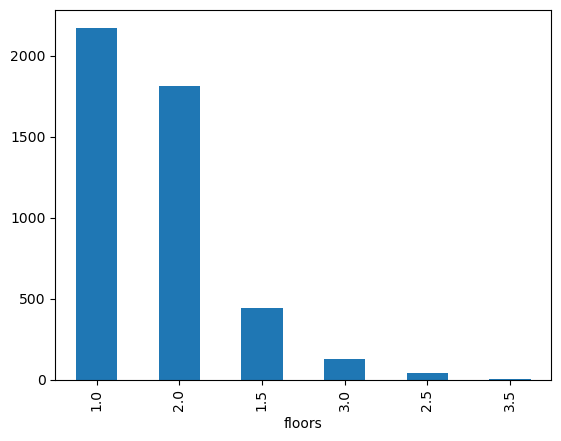

In [18]:
data.floors.value_counts().plot(kind='bar')
plt.show()

## Feature Engineering

Create new features that might help improve the model’s predictive power. For instance, calculating the age of the house, distance to the city center, or the neighborhood crime rate.
Select the most relevant features using techniques like correlation analysis or feature importance scores from preliminary models


Feature engineering is the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The goal of feature engineering and selection is to improve the performance of machine learning algorithms.

Feature engineering involves several steps, including feature creation, transformations, extraction, and selection. Feature creation involves identifying the variables that will be most useful in the predictive model. Transformation involves manipulating the predictor variables to improve model performance, such as ensuring variables are on the same scale or within an acceptable range for the model. Feature extraction is the automatic creation of new variables by extracting them from raw data, while feature selection algorithms analyze, judge, and rank various features to determine which features are irrelevant or redundant and which features are most useful for the model.

In [45]:
trained = pd.DataFrame({'Bedrooms':data['bedrooms'],
                        'Bathrooms':data['bathrooms'],
                        'Floors':data['floors'],
                        'Sqft_Living':data['sqft_living']
                       })

In [46]:
Prd_Value = data['price']

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(trained,Prd_Value ,test_size = 0.3)

In [48]:
trained.columns

Index(['Bedrooms', 'Bathrooms', 'Floors', 'Sqft_Living'], dtype='object')

## LinearRegression

In [81]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(x_test,y_test)
regression.score(x_test,y_test)

0.2602230449614611

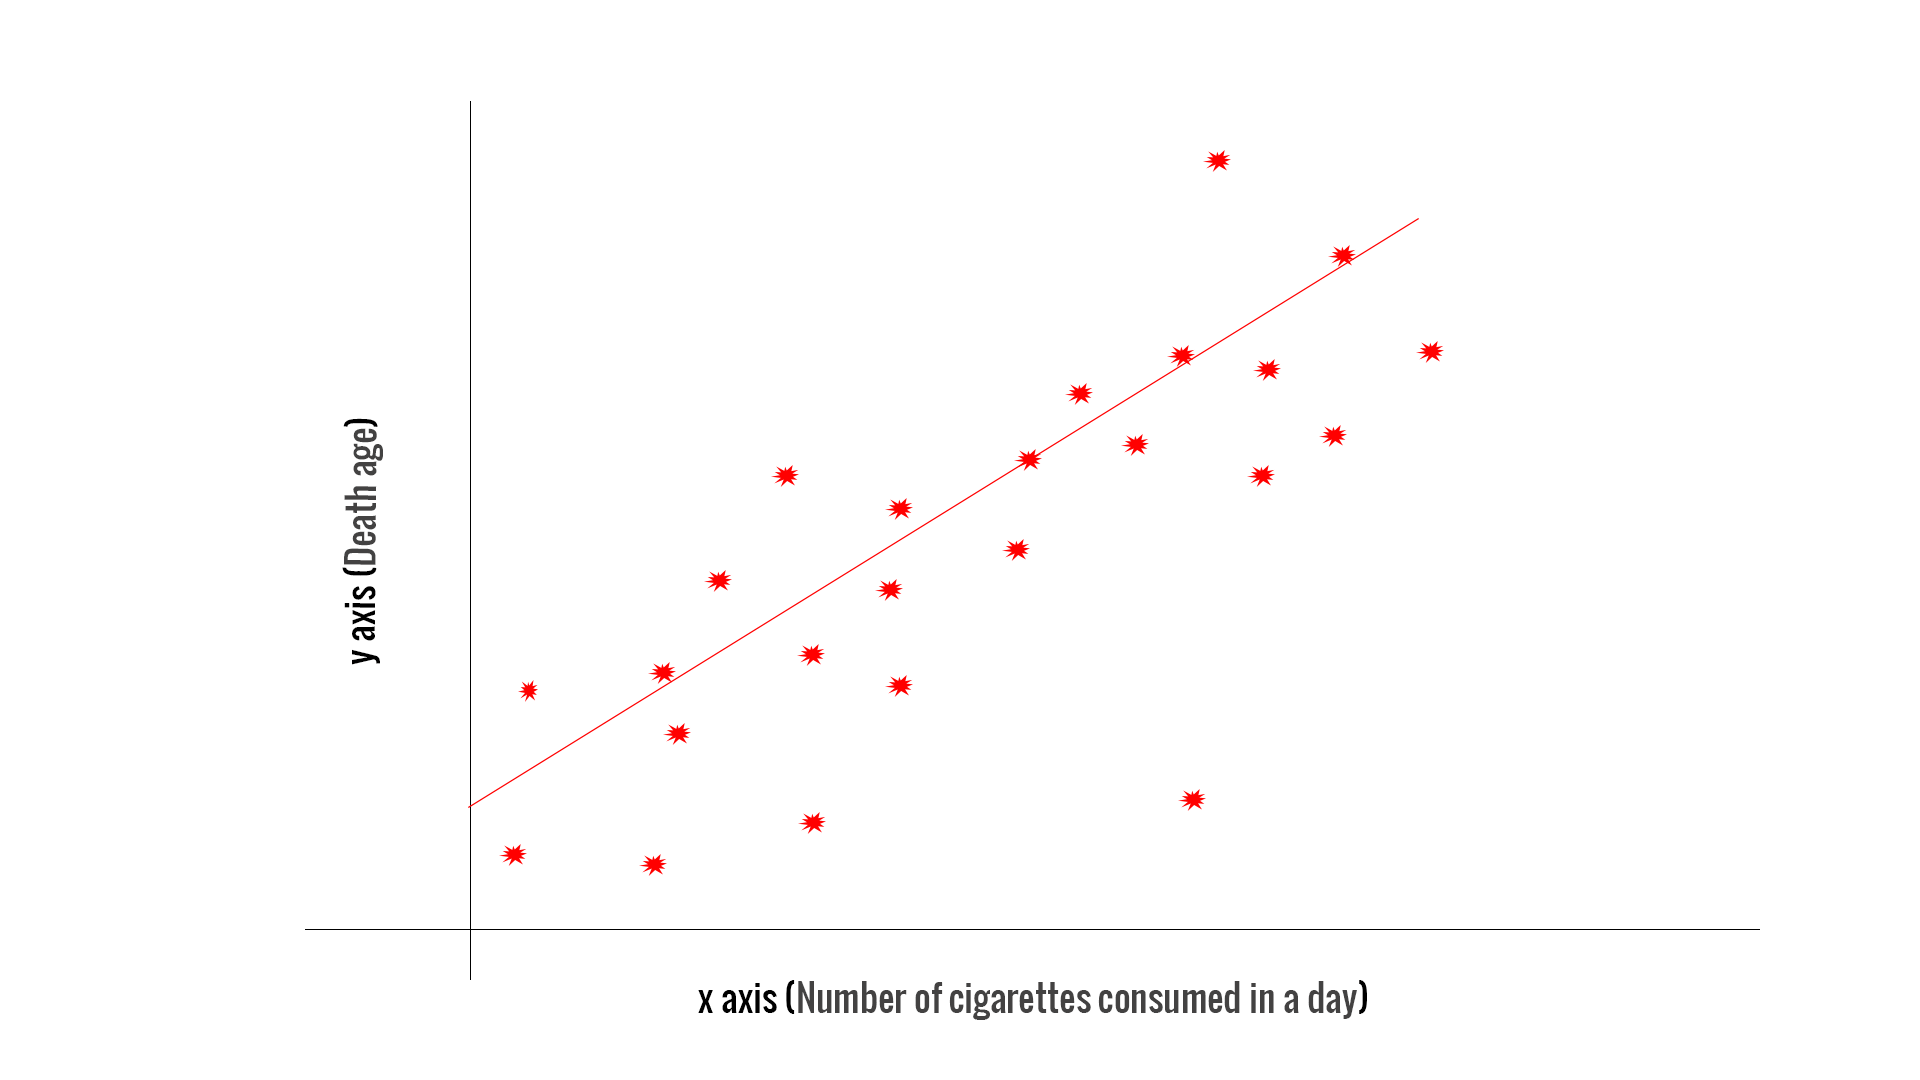

In [171]:
from IPython.display import Image
Image(filename='linear.png')

### Graphical Representation Linear Regression

In [50]:
y_pred = regression.predict(x_train)

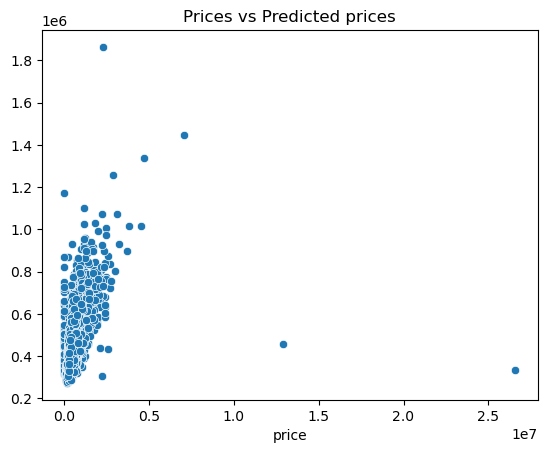

In [51]:
sns.scatterplot(x=y_train,y= y_pred)

plt.title("Prices vs Predicted prices")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16608\2283523621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


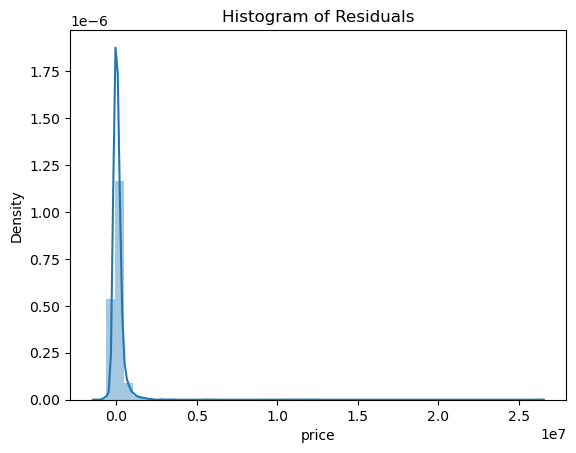

In [52]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.show()

# What is linear regression explaination 
- Linear regression is one of the simplest and most commonly used regression algorithms.
- It assumes a linear relationship between the predictor variables and the target variable.


In [80]:
# model validation
train=regression.score(x_test,y_test)
test =regression.score(x_train,y_train)

if train > test:
    print("overfitting Condition")
else:
    print("underfitting")

print(train)
print(test)

overfitting Condition
0.14613103142419848
0.10203400407338814


Linear regression assumes that the target variable can be expressed as a linear combination of the independent variables (plus error). If the data does not follow this assumption, the model may not capture the true relationship and produce inaccurate or unstable estimates

-------------------------------------------------

## XGBOOST

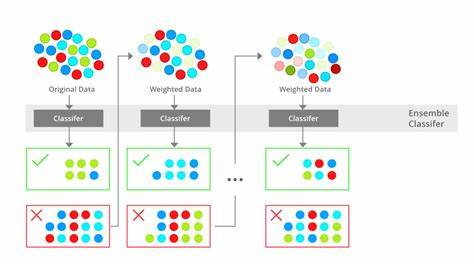

In [172]:
Image(filename='xgb.jpg')

In [86]:
from xgboost import XGBRegressor
xgb= XGBRegressor()

xgb.fit(x_test,y_test)
xgb.score(x_test,y_test)

0.9406569707781233

In [85]:
x_train,x_test,y_train, y_test = train_test_split(trained,Prd_Value ,test_size = 0.2)

### Graphical Representation Xgboost

In [83]:
y_pred_xgb = xgb.predict(x_train)

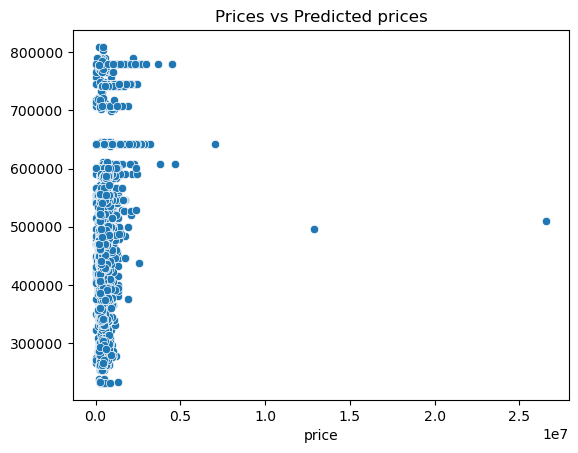

In [56]:
sns.scatterplot(x=y_train,y= y_pred_xgb)

plt.title("Prices vs Predicted prices")
plt.show()

# What is XGBOOST explaination
- Gradient boosting regression builds an ensemble of weak prediction models (typically decision trees) sequentially.
- Each new model corrects errors made by the previous models, gradually improving prediction accuracy.


In [97]:
# model validation
train_xgb=xgb.score(x_test,y_test)
test_xgb =xgb.score(x_train,y_train)

if train_xgb > test_xgb:
    print("overfitting Condition")
else:
    print("underfitting")
print(train_xgb)
print(test_xgb)

overfitting Condition
0.16726710008355583
0.06462818601505105


In [ ]:
print(accuracy_score(trained, y_pred))

In [89]:
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error

In [124]:
# model fit
from sklearn.linear_model import Ridge

# Create a Ridge Regression model
ridge = Ridge(alpha=0.7).fit(x_train, y_train)

In [125]:
# Evaluate the model
train_score = ridge.score(x_train, y_train)
test_score = ridge.score(x_test, y_test)

print(f"Ridge Regression - Training set R-squared: {train_score:.2f}")
print(f"Ridge Regression - Testing set R-squared: {test_score:.2f}")

Ridge Regression - Training set R-squared: 0.17
Ridge Regression - Testing set R-squared: 0.47


In [126]:
# Make predictions on the test data
y_pred = xgb.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=True)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared score:", r2)

MSE: 7078852637.707547
RMSE: 7078852637.707547
MAE: 60590.75122132813
R-squared score: 0.9406569707781233



MSE (Mean Squared Error): This measures the average of the square of the errors. A lower value is better, as it indicates that the model is making more accurate predictions. In your case, the MSE is quite high, which might indicate that the model is not performing well.

RMSE (Root Mean Squared Error): This is the square root of the MSE. It's also a measure of the average magnitude of the errors. Again, a lower value is better. Since the RMSE is the same as the MSE, it's also quite high.

MAE (Mean Absolute Error): This measures the average absolute difference between predicted and actual values. A lower value is better. In your case, the MAE is relatively high, which might indicate that the model is not making accurate predictions.

R-squared score: This measures how well the model explains the variance in the data. A value close to 1 is ideal, as it indicates that the model is explaining most of the variance. In your case, the R-squared score is 0.94, which is relatively high. This suggests that the model is doing a good job of explaining the variance in the data.

Overall, it seems that the model is doing well in terms of explaining the variance in the data (R-squared score), but it's not making accurate predictions (high MSE, RMSE, and MAE). This might indicate that the model is overfitting or that there's some issue with the data or the model itself.

XGBoost is a type of gradient boosting algorithm that uses decision trees as base learners. It iteratively adds trees to the ensemble and fits them to correct the prediction errors made by prior models. The values of the model depend on the number of trees, the learning rate, the depth of the trees, the regularization parameters, and the loss function used2. These parameters can be tuned to improve the model performance and reduce overfitting.

------------------------------------------------------------------------

## Support Vector Regressor

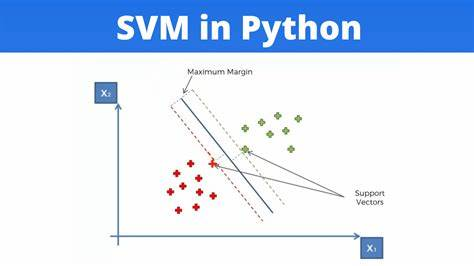

In [173]:
Image(filename='svm.jpg')

In [32]:
from sklearn import svm
svm = svm.SVR()

svm.fit(x_test,y_test)
svm.score(x_test,y_test)

-0.040503449678021886

### Graphical Representation SVM

In [132]:
y_pred_svm = svm.predict(x_train)

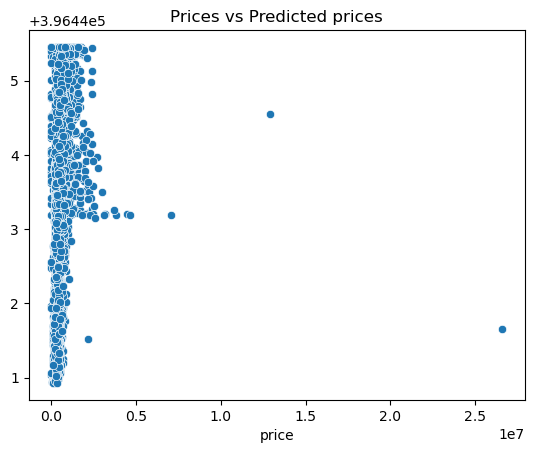

In [133]:
sns.scatterplot(x=y_train,y= y_pred_svm)

plt.title("Prices vs Predicted prices")
plt.show()

# What is Svm explaination
- SVM finds the optimal hyperplane that separates the classes with the maximum margin.
- It can handle linear and non-linear classification by using different kernel functions.
- SVM is effective in high-dimensional spaces and is robust to overfitting.


In [44]:
# model validation
train_svm=svm.score(x_test,y_test)
test_svm =svm.score(x_train,y_train)
print(train_svm)
print(test_svm)

-0.040503449678021886
-0.08239972074750179


In [130]:
# Make predictions on the test data
y_pred = svm.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=True)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared score:", r2)

MSE: 142342008720.8955
RMSE: 142342008720.8955
MAE: 237960.7736548287
R-squared score: -0.19327331918584223


SVM regression tries to find a hyperplane that separates the data points with a maximum margin. It uses a kernel function to map the data to a higher-dimensional space where the separation is possible. The values of the model depend on the choice of the kernel function, the penalty parameter, and the epsilon parameter that controls the width of the margin3. These parameters can affect the complexity and generalization ability of the model.

-----------------------------------------------------------

## Random Forest Regressor

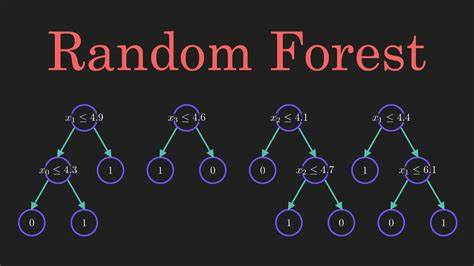

In [175]:
Image(filename='random_forest.jpg')

In [61]:
from sklearn.ensemble import RandomForestRegressor
rad = RandomForestRegressor()

rad.fit(x_test,y_test)
rad.score(x_test,y_test)

0.81541252939443

### Graphical Representation Random Forest Regressor

In [62]:
y_pred_rfr = rad.predict(x_train)

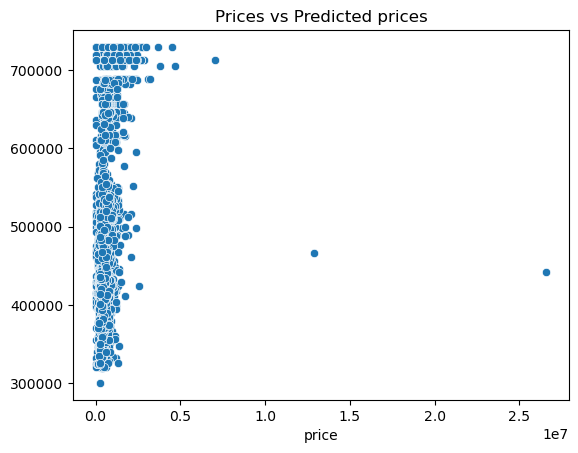

In [63]:
sns.scatterplot(x=y_train,y= y_pred_rfr)

plt.title("Prices vs Predicted prices")
plt.show()

# What is Random Forest and explaination
- Random forest regression is an ensemble method that combines multiple decision trees to make predictions.
- It reduces overfitting and improves prediction accuracy by averaging the predictions of many trees.


In [64]:
# model validation
train_x=rad.score(x_test,y_test)
test_x =rad.score(x_train,y_train)
print(train_x)
print(test_x)

0.81541252939443
0.0763217846851526


In [131]:
# Make predictions on the test data
y_pred = rad.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=True)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared score:", r2)

MSE: 93525905107.38516
RMSE: 93525905107.38516
MAE: 197167.64647130435
R-squared score: 0.2159590255875976


Random forest is another type of ensemble method that uses decision trees as base learners. It creates many trees from random subsets of the data and features, and averages their predictions. The values of the model depend on the number of trees, the maximum depth of the trees, the minimum number of samples required to split a node, and the criterion used to measure the quality of a split4. These parameters can influence the diversity and accuracy of the trees.

### Model Evaluation

Evaluate the model’s performance using appropriate metrics such as 

Mean Absolute Error (MAE), 

Mean Squared Error (MSE), 

Root Mean Squared Error (RMSE),

R-squared.

Compare the performance of different models to select the best one.

In [65]:
print('random forest: ',rad.score(x_test,y_test))
print('XGBoost :',xgb.score(x_test,y_test))
print('linear regresstion :',regression.score(x_test,y_test))
print('SVM Regressor : ',svm.score(x_test,y_test))

random forest:  0.81541252939443
XGBoost : 0.9999999978495061
linear regresstion : 0.21491951561417333
SVM Regressor :  -0.14348025007553478


In [168]:
# Initialize an empty dataframe to store scores
scores_df = pd.DataFrame(columns=["model_name","MSE","RMSE","MAE","R-squared_score"])

# Define a function to collect scores from different models
def collect_scores(model,model_name):
    global scores_df
    y_true = trained
    y_pred = model.predict(x_test)
    mse = round(mean_squared_error(y_test, y_pred))
    rmse = round(mean_squared_error(y_test, y_pred, squared=True))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    new_row = {'model_name': model_name, "MSE":mse,"RMSE":rmse,"MAE":mae,"R-squared_score":r2}
    
    scores_df = pd.concat([scores_df, pd.DataFrame(new_row, index=[1])], ignore_index=True)

# Collect scores
collect_scores( regression,'Linear Regression')
collect_scores(xgb,'Random Forest')
collect_scores(svm,'Support Vector Regressor')
collect_scores(rad,'Random Forest Regressor')

scores_df

,model_name,MSE,RMSE,MAE,R-squared_score
0,Linear Regression,63441973823,63441973823,173490.451919,0.468157
1,Random Forest,7078852638,7078852638,60590.751221,0.940657
2,Support Vector Regressor,142342008721,142342008721,237960.773655,-0.193273
3,Random Forest Regressor,93525905107,93525905107,197167.646471,0.215959


---------------------------------------------

### Deployment

Deploy the trained model to a production environment where it can make predictions on new data. Monitor the model’s performance over time and retrain it periodically with new data to maintain its accuracy.

In [102]:
# XGBoost best model
prd=xgb.predict([[2,3,1,2300]])

## Django Frame Work ------------------------------------------------------- |||